Machine Learning Model(s) using Team_merge file

## Upload and Prepare the data

In [1]:
#import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
# add import warnigns to skip any warning messages on the screen
import warnings
warnings.filterwarnings('ignore')

In [4]:
#create file direcotry
file_dir = 'C:/Users/larys/DAB/Final_Project/Resources/'

In [5]:
#import the csv files
shot_log = pd.read_csv(f'{file_dir}Team_merge.csv')
#stats = pd.read_csv(f'{file_dir}players_stats.csv', index_col=0)

## SHOT LOG dataset

In [6]:
print(shot_log.shape)
shot_log.head()

(118629, 79)


,MATCHUP,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_DIST,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,"MAR 04, 2015 - CHA @ BKN",1,1,00:01:09,7.7,made,"Anderson, Alan",101187,1.3,Brian Roberts,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
1,"MAR 04, 2015 - CHA @ BKN",2,1,00:10:51,15.6,made,"Anderson, Alan",101187,4.2,Al Jefferson,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
2,"MAR 04, 2015 - CHA @ BKN",2,1,00:02:31,20.0,missed,"Anderson, Alan",101187,1.8,Gerald Henderson,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
3,"MAR 04, 2015 - CHA @ BKN",5,3,00:11:36,21.2,made,"Anderson, Alan",101187,4.1,Gerald Henderson,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"
4,"MAR 04, 2015 - CHA @ BKN",6,3,00:09:52,4.3,made,"Anderson, Alan",101187,3.6,Gerald Henderson,...,11.2,22.1,0.202,0.487,12.0,79.3,0.188,Time Warner Cable Arena,"704,886","17,192"


In [7]:
shot_log.columns

Index(['MATCHUP', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_DIST',
       'SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID',
       'CLOSE_DEF_DIST', 'player_name', 'player_id', 'DATE', 'TIMESTAMP',
       'Name (Shooter)', 'Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age_x',
       'Birth_Place', 'Birthdate', 'Collage', 'Experience', 'Height (Shooter)',
       'Pos', 'Team', 'Weight', 'BMI', 'CD Last Name', 'CD First Name',
       'CD NAME', 'Name (CD)', 'Height (CD)', 'Rk', 'Age_y', 'W', 'L', 'PW',
       'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr',
       '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'eFG%.1', 'TOV%.1',
       'DRB%', 'FT/FGA.1', 'Arena', 'Attend.', 'Attend./G'],
      dtype='object')

In [8]:
shot_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118629 entries, 0 to 118628
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   MATCHUP                     118629 non-null  object 
 1   SHOT_NUMBER                 118629 non-null  int64  
 2   PERIOD                      118629 non-null  int64  
 3   GAME_CLOCK                  118629 non-null  object 
 4   SHOT_DIST                   118629 non-null  float64
 5   SHOT_RESULT                 118629 non-null  object 
 6   CLOSEST_DEFENDER            118629 non-null  object 
 7   CLOSEST_DEFENDER_PLAYER_ID  118629 non-null  int64  
 8   CLOSE_DEF_DIST              118629 non-null  float64
 9   player_name                 118629 non-null  object 
 10  player_id                   118629 non-null  int64  
 11  DATE                        118629 non-null  object 
 12  TIMESTAMP                   118629 non-null  object 
 13  Name (Shooter)

In [9]:
# # Clean version of correlation matrix (visualize)
# corr = shot_log.corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# # 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [10]:
# check all non-numeric columns
shot_log.describe(include=np.object)

,MATCHUP,GAME_CLOCK,SHOT_RESULT,CLOSEST_DEFENDER,player_name,DATE,TIMESTAMP,Name (Shooter),Birth_Place,Birthdate,...,Experience,Pos,Team,CD Last Name,CD First Name,CD NAME,Name (CD),Arena,Attend.,Attend./G
count,118629,118629,118629,118629,118629,118629,118629,102194,92270,92270,...,92270,92270,92270,118629,118629,118629,118629,92270,92270,92270
unique,1784,719,2,455,265,120,59839,228,34,200,...,35,5,28,372,322,455,455,27,28,28
top,"FEB 07, 2015 - DAL vs. POR",00:00:01,missed,"Jordan, DeAndre",Mnta Ellis,2015-01-07 00:00:00,2015-01-07 00:00:01,James Harden,us,"September 2, 1989",...,3,PG,GSW,Green,Chris,DeAndre Jordan,DeAndre Jordan,STAPLES Center,"803,436","19,596"
freq,105,793,65103,753,1047,1781,18,1043,69873,1339,...,7155,22060,4938,2150,1912,753,753,7512,4938,4938


### Prepare file

In [11]:
#drop columns
shot_log_model = shot_log.drop(columns = ['PERIOD', 'GAME_CLOCK', 'MATCHUP', 'DATE', 'TIMESTAMP', 'Birthdate',\
                                          'CD Last Name', 'CD First Name' , 'CD NAME', 'Name (CD)', 'player_name',\
                                          'Collage', 'Name (Shooter)' , 'Arena', 'Birth_Place', 'Pos', 'Team',\
                                          'CLOSEST_DEFENDER', 'Birthdate', 'player_id', 'Age_x', 'FT/FGA.1', 'FT/FGA',\
                                         'SOS', '3PAr', 'Pace', 'TOV%', 'TOV%.1', 'eFG%.1', 'FTr', 'TOV', 'STL', 'DRB%',\
                                          'Attend.', 'Attend./G', 'DRtg', 'Age_y', 'ORB%', 'FGA', 'Rk', 'W', 'L',\
                                          'SHOT_NUMBER', 'PTS', 'PW', 'PL'])
                                          #'player_name', 'CLOSEST_DEFENDER', 'GAME_CLOCK', 'Name (Shooter)','Birth_Place', , 'Team', 'BMI'])''
shot_log_model

,SHOT_DIST,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,Games Played,MIN,FGM,FG%,3PM,3PA,...,Height (Shooter),Weight,BMI,Height (CD),MOV,SRS,ORtg,NRtg,TS%,eFG%
0,7.7,made,101187,1.3,72.0,1330.0,176.0,38.9,62.0,193.0,...,182.5,77.85,23.373991,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
1,15.6,made,101187,4.2,65.0,1992.0,486.0,48.1,2.0,5.0,...,205.0,130.05,30.945866,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
2,20.0,missed,101187,1.8,80.0,2315.0,370.0,43.7,45.0,136.0,...,192.5,96.75,26.108956,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
3,21.2,made,101187,4.1,80.0,2315.0,370.0,43.7,45.0,136.0,...,192.5,96.75,26.108956,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
4,4.3,made,101187,3.6,80.0,2315.0,370.0,43.7,45.0,136.0,...,192.5,96.75,26.108956,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118624,12.3,missed,203906,3.0,65.0,2513.0,421.0,46.2,73.0,193.0,...,197.5,99.00,25.380548,195.0,3.00,2.54,107.5,3.2,0.536,0.489
118625,5.9,missed,203906,2.5,65.0,2513.0,421.0,46.2,73.0,193.0,...,197.5,99.00,25.380548,195.0,3.00,2.54,107.5,3.2,0.536,0.489
118626,18.8,made,203906,4.3,65.0,2513.0,421.0,46.2,73.0,193.0,...,197.5,99.00,25.380548,195.0,3.00,2.54,107.5,3.2,0.536,0.489
118627,25.1,missed,203906,3.7,65.0,2513.0,421.0,46.2,73.0,193.0,...,197.5,99.00,25.380548,195.0,3.00,2.54,107.5,3.2,0.536,0.489


In [12]:
# check all non-numeric columns
shot_log_model.describe(include=np.object)

,SHOT_RESULT,Experience
count,118629,92270
unique,2,35
top,missed,3
freq,65103,7155


In [13]:
#drop any nans and change objects data types
shot_log_model = shot_log_model.dropna()

In [14]:
# to abvoid error later on
shot_log_model = shot_log_model.fillna(0)

In [15]:
#get a list of columns that are objects
for col in shot_log_model.columns:
    if shot_log_model[col].dtypes == 'object':
        print(col)

SHOT_RESULT
Experience


In [16]:
# Change data type in column

# shot_log_model['Attend.'] = shot_log_model['Attend.'].str.replace(',', '').astype(float)
# shot_log_model['Attend./G'] = shot_log_model['Attend./G'].str.replace(',', '').astype(float)
shot_log_model['Experience'] = shot_log_model['Experience'].str.replace('R', '0').astype(float)

In [17]:
# mimport labelencoder to changesex itno numerical
from sklearn.preprocessing import LabelEncoder

# get the function
encoder = LabelEncoder()
#shot_log_model = shot_log_model.copy()
shot_log_model['SHOT_RESULT'] = encoder.fit_transform(shot_log_model['SHOT_RESULT'])
# # shot_log_model['Pos'] = encoder.fit_transform(shot_log_model['Pos'])
# # shot_log_model['Team'] = encoder.fit_transform(shot_log_model['Team'])

In [18]:
# #check again
shot_log_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81522 entries, 0 to 118628
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SHOT_DIST                   81522 non-null  float64
 1   SHOT_RESULT                 81522 non-null  int32  
 2   CLOSEST_DEFENDER_PLAYER_ID  81522 non-null  int64  
 3   CLOSE_DEF_DIST              81522 non-null  float64
 4   Games Played                81522 non-null  float64
 5   MIN                         81522 non-null  float64
 6   FGM                         81522 non-null  float64
 7   FG%                         81522 non-null  float64
 8   3PM                         81522 non-null  float64
 9   3PA                         81522 non-null  float64
 10  3P%                         81522 non-null  float64
 11  FTM                         81522 non-null  float64
 12  FTA                         81522 non-null  float64
 13  FT%                         81

## Analyze and select features

### Correlation Matrix with Heatmap

In [19]:
cr = shot_log_model.corr()
cr.style.background_gradient(cmap='RdBu_r').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,SHOT_DIST,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,Games Played,MIN,FGM,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,BLK,PF,EFF,AST/TOV,STL/TOV,Experience,Height (Shooter),Weight,BMI,Height (CD),MOV,SRS,ORtg,NRtg,TS%,eFG%
SHOT_DIST,1.00,0.19,0.00,0.52,-0.03,-0.00,-0.05,-0.34,0.31,0.32,0.27,-0.03,-0.09,0.25,-0.33,-0.23,-0.27,0.08,-0.23,-0.15,-0.12,0.18,0.12,0.03,-0.22,-0.25,-0.17,-0.24,0.02,0.02,0.02,0.02,0.02,0.02
SHOT_RESULT,0.19,1.00,0.01,-0.00,-0.02,-0.02,-0.03,-0.10,0.04,0.05,0.04,-0.01,-0.02,0.03,-0.06,-0.05,-0.06,0.01,-0.05,-0.03,-0.04,0.03,0.01,-0.01,-0.05,-0.05,-0.03,-0.02,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02
CLOSEST_DEFENDER_PLAYER_ID,0.00,0.01,1.00,-0.02,-0.00,0.00,0.01,-0.02,0.03,0.03,0.01,0.02,0.01,0.03,-0.03,-0.03,-0.03,0.03,-0.02,-0.01,0.00,0.03,0.00,-0.00,-0.05,-0.05,-0.02,-0.07,0.01,0.02,0.01,0.01,0.01,0.01
CLOSE_DEF_DIST,0.52,-0.00,-0.02,1.00,0.01,-0.01,-0.06,-0.13,0.11,0.11,0.12,-0.06,-0.08,0.08,-0.13,-0.08,-0.10,0.02,-0.08,-0.04,-0.06,0.08,0.09,0.00,-0.05,-0.08,-0.08,-0.03,0.04,0.04,0.04,0.04,0.05,0.06
Games Played,-0.03,-0.02,-0.00,0.01,1.00,0.62,0.40,0.19,0.22,0.21,-0.04,0.23,0.24,0.01,0.21,0.39,0.35,0.25,0.25,0.62,0.46,0.01,0.03,-0.13,0.07,0.05,-0.01,0.03,0.34,0.34,0.25,0.34,0.26,0.28
MIN,-0.00,-0.02,0.00,-0.01,0.62,1.00,0.84,0.16,0.43,0.43,0.20,0.64,0.65,0.21,0.24,0.56,0.47,0.56,0.26,0.56,0.83,0.17,0.02,-0.05,-0.07,-0.08,-0.05,-0.02,0.19,0.19,0.16,0.19,0.16,0.19
FGM,-0.05,-0.03,0.01,-0.06,0.40,0.84,1.00,0.29,0.36,0.34,0.21,0.74,0.74,0.26,0.29,0.56,0.49,0.53,0.26,0.43,0.90,0.08,-0.14,0.03,-0.02,0.03,0.08,0.02,0.19,0.20,0.18,0.19,0.18,0.21
FG%,-0.34,-0.10,-0.02,-0.13,0.19,0.16,0.29,1.00,-0.40,-0.48,-0.35,0.11,0.18,-0.33,0.65,0.53,0.60,-0.14,0.55,0.33,0.43,-0.34,-0.15,0.09,0.49,0.50,0.28,0.26,0.16,0.17,0.18,0.16,0.22,0.21
3PM,0.31,0.04,0.03,0.11,0.22,0.43,0.36,-0.40,1.00,0.99,0.58,0.32,0.23,0.53,-0.49,-0.21,-0.32,0.42,-0.31,-0.01,0.23,0.29,0.24,-0.02,-0.46,-0.51,-0.32,-0.26,0.27,0.28,0.28,0.27,0.29,0.31
3PA,0.32,0.05,0.03,0.11,0.21,0.43,0.34,-0.48,0.99,1.00,0.57,0.33,0.23,0.52,-0.52,-0.23,-0.34,0.43,-0.35,-0.01,0.20,0.31,0.23,-0.04,-0.50,-0.54,-0.33,-0.27,0.24,0.24,0.24,0.23,0.24,0.27


In [20]:
shot_log_model.corr()['SHOT_RESULT'].to_frame(name = 'Correlation with SHOT_RESULT').abs().sort_values(by = 'Correlation with SHOT_RESULT', ascending = False)

,Correlation with SHOT_RESULT
SHOT_RESULT,1.000000
SHOT_DIST,0.187461
FG%,0.100963
OREB,0.063149
REB,0.058824
BLK,0.054832
DREB,0.052246
3PA,0.048207
Weight,0.048161
Height (Shooter),0.046110


In [21]:
shot_log_model.corr()['SHOT_DIST'].to_frame(name = 'Correlation with SHOT DIST').abs().sort_values(by = 'Correlation with SHOT DIST', ascending = False)

,Correlation with SHOT DIST
SHOT_DIST,1.000000
CLOSE_DEF_DIST,0.519897
FG%,0.338318
OREB,0.329494
3PA,0.322365
3PM,0.311645
REB,0.274698
3P%,0.273447
FT%,0.251375
Weight,0.245818


In [22]:
shot_log_model.corr()['FGM'].to_frame(name = 'Correlation with FGM').abs().sort_values(by = 'Correlation with FGM', ascending = False)

,Correlation with FGM
FGM,1.000000
EFF,0.899246
MIN,0.837382
FTA,0.742150
FTM,0.737254
DREB,0.556722
AST,0.527878
REB,0.489137
PF,0.427760
Games Played,0.397647


In [23]:
shot_log_model.corr()['CLOSE_DEF_DIST'].to_frame(name = 'Correlation with Closest Def Dist').abs().sort_values(by = 'Correlation with Closest Def Dist', ascending = False)

,Correlation with Closest Def Dist
CLOSE_DEF_DIST,1.000000
SHOT_DIST,0.519897
FG%,0.129722
OREB,0.127816
3P%,0.124854
3PA,0.109151
3PM,0.106978
REB,0.100098
STL/TOV,0.092052
BLK,0.084844


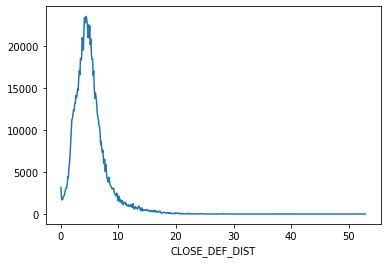

In [24]:
# check close defenedrs distance andhow it impacts points
shot_log_model.groupby('CLOSE_DEF_DIST')['SHOT_DIST'].sum().plot()

# the most seems to be within 1-10 ft wih 5 being peak

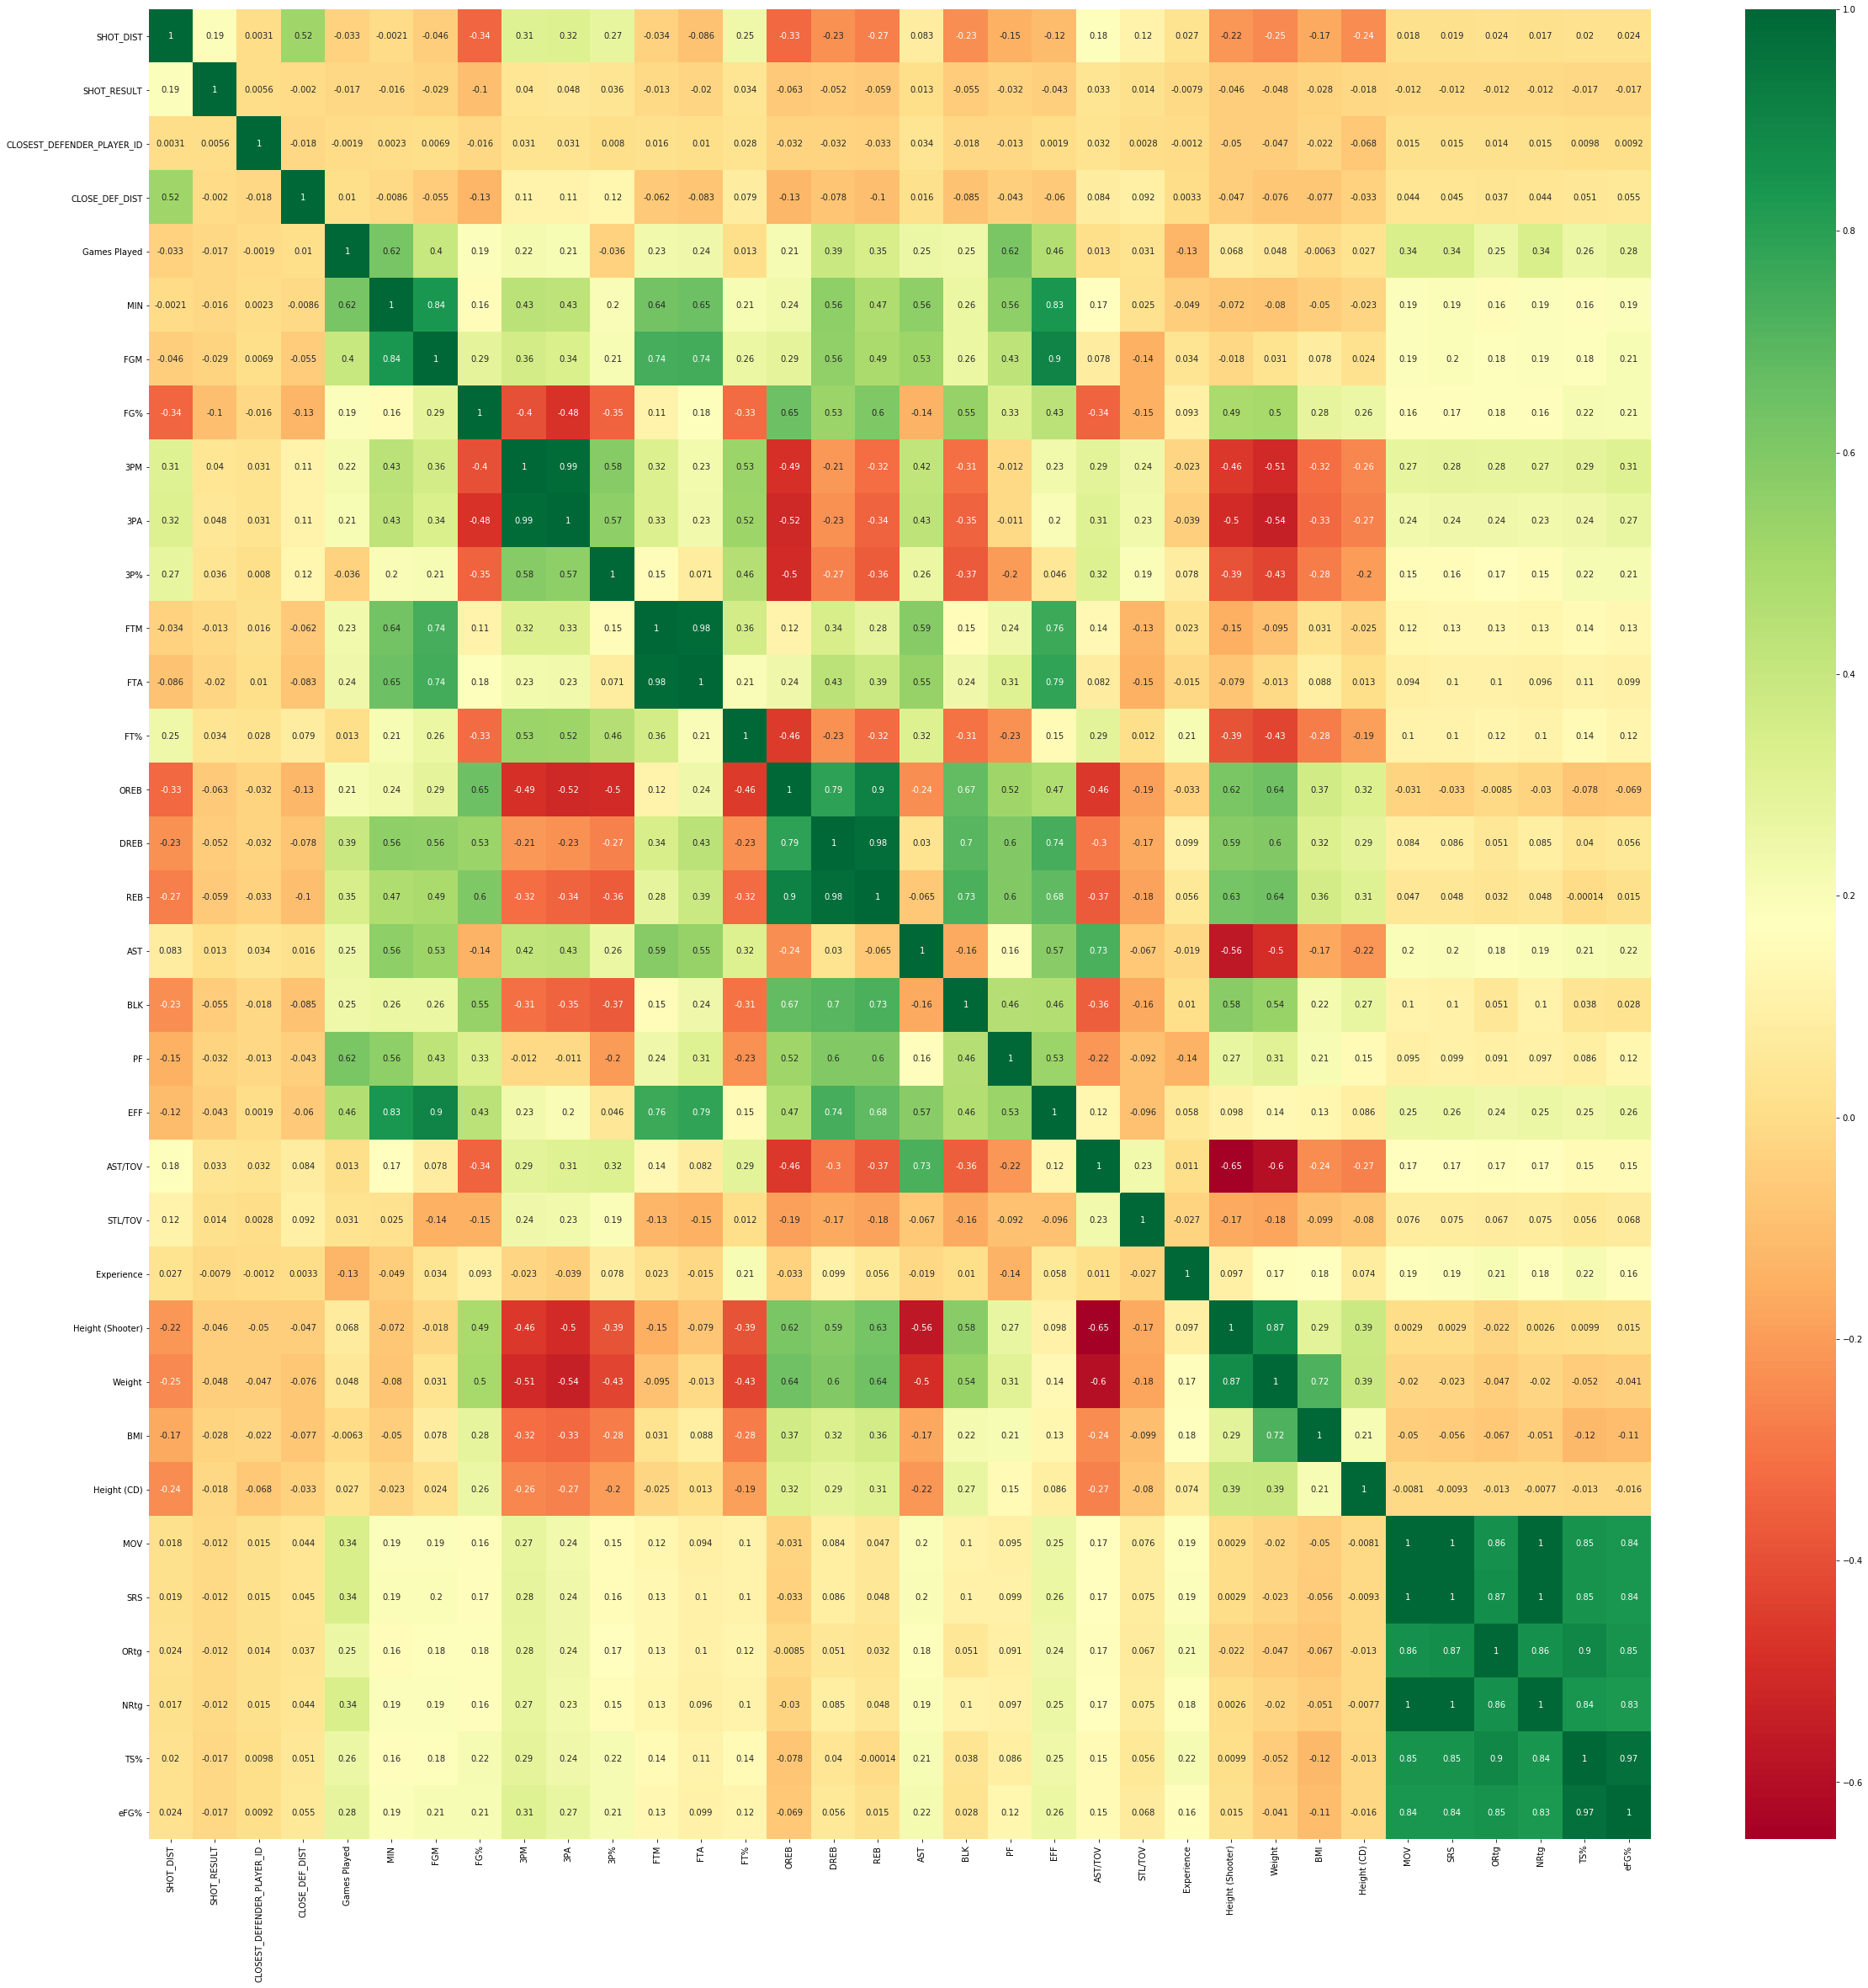

In [25]:
# X = shot_log_model.iloc[:,0:40]  #independent columns
# y = shot_log_model.iloc[:, 3]    #target column i.e price range

#X = shot_log_model.drop(['SHOT_RESULT', 'FGM', 'PTS'], axis =1)
X = shot_log_model.drop(['SHOT_RESULT'], axis =1)

#create target
y = shot_log_model['SHOT_RESULT']

#get correlations of each features in dataset
corrmat = shot_log_model.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(shot_log_model[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Train and Split

In [26]:
# create X feature
#X = shot_log_model.drop(['SHOT_RESULT', 'FGM', 'PTS'], axis =1)
X = shot_log_model.drop(['SHOT_RESULT'], axis =1)

#create target
y = shot_log_model['SHOT_RESULT']

In [27]:
X

,SHOT_DIST,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,Games Played,MIN,FGM,FG%,3PM,3PA,3P%,...,Height (Shooter),Weight,BMI,Height (CD),MOV,SRS,ORtg,NRtg,TS%,eFG%
0,7.7,101187,1.3,72.0,1330.0,176.0,38.9,62.0,193.0,32.1,...,182.5,77.85,23.373991,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
1,15.6,101187,4.2,65.0,1992.0,486.0,48.1,2.0,5.0,40.0,...,205.0,130.05,30.945866,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
2,20.0,101187,1.8,80.0,2315.0,370.0,43.7,45.0,136.0,33.1,...,192.5,96.75,26.108956,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
3,21.2,101187,4.1,80.0,2315.0,370.0,43.7,45.0,136.0,33.1,...,192.5,96.75,26.108956,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
4,4.3,101187,3.6,80.0,2315.0,370.0,43.7,45.0,136.0,33.1,...,192.5,96.75,26.108956,195.0,-3.17,-3.44,100.1,-3.4,0.498,0.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118624,12.3,203906,3.0,65.0,2513.0,421.0,46.2,73.0,193.0,37.8,...,197.5,99.00,25.380548,195.0,3.00,2.54,107.5,3.2,0.536,0.489
118625,5.9,203906,2.5,65.0,2513.0,421.0,46.2,73.0,193.0,37.8,...,197.5,99.00,25.380548,195.0,3.00,2.54,107.5,3.2,0.536,0.489
118626,18.8,203906,4.3,65.0,2513.0,421.0,46.2,73.0,193.0,37.8,...,197.5,99.00,25.380548,195.0,3.00,2.54,107.5,3.2,0.536,0.489
118627,25.1,203906,3.7,65.0,2513.0,421.0,46.2,73.0,193.0,37.8,...,197.5,99.00,25.380548,195.0,3.00,2.54,107.5,3.2,0.536,0.489


In [28]:
y.value_counts()

1    44714
0    36808
Name: SHOT_RESULT, dtype: int64

In [29]:
#check X
X.describe()

,SHOT_DIST,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,Games Played,MIN,FGM,FG%,3PM,3PA,3P%,...,Height (Shooter),Weight,BMI,Height (CD),MOV,SRS,ORtg,NRtg,TS%,eFG%
count,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,...,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000,81522.000000
mean,13.643980,159116.668126,4.120716,70.587645,1977.186710,339.246608,45.235635,72.686882,201.596894,30.738423,...,196.827574,99.533114,25.594098,198.596422,0.856755,0.837091,106.042332,0.882081,0.536057,0.497995
std,8.894106,78399.213872,2.768457,10.580012,545.598118,136.978362,5.057649,61.759538,158.846580,11.919548,...,9.088166,12.485211,1.616316,8.876427,4.738906,4.662513,3.582908,4.970196,0.019204,0.020942
min,0.000000,708.000000,0.000000,35.000000,363.000000,30.000000,32.500000,0.000000,0.000000,0.000000,...,172.500000,72.450000,22.016000,172.500000,-9.320000,-9.500000,95.500000,-10.100000,0.494000,0.456000
25%,4.800000,101187.000000,2.300000,66.000000,1566.000000,240.000000,42.100000,12.000000,42.000000,29.700000,...,190.000000,90.000000,24.324324,192.500000,-2.600000,-2.920000,103.500000,-2.800000,0.523000,0.489000
50%,13.800000,201945.000000,3.700000,74.000000,2045.000000,338.000000,44.600000,69.000000,193.000000,34.500000,...,197.500000,99.000000,25.510204,200.000000,0.720000,0.710000,105.300000,0.700000,0.536000,0.494000
75%,22.700000,202738.000000,5.300000,78.000000,2414.000000,421.000000,48.500000,115.000000,313.000000,37.500000,...,205.000000,108.000000,26.534209,205.000000,4.230000,4.080000,108.500000,4.500000,0.553000,0.512000
max,46.900000,530027.000000,52.900000,82.000000,2981.000000,653.000000,66.600000,286.000000,646.000000,50.000000,...,215.000000,130.050000,31.714678,215.000000,10.100000,10.010000,112.400000,10.200000,0.571000,0.540000


In [30]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
# Check output
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61141, 33)
(20381, 33)
(61141,)
(20381,)


In [32]:
shot_log_model.isnull().values.any()

True

In [33]:
shot_log_model.isnull().sum().sum()

33614

In [34]:
shot_log_model = shot_log_model.fillna(0)

## Balanced Random Forest Classifier

In [35]:
# create X feature
#X = shot_log_model.drop(['SHOT_RESULT', 'FGM', 'PTS'], axis =1)
X = shot_log_model.drop(['SHOT_RESULT', 'FGM'], axis =1)

#create target
y = shot_log_model['SHOT_RESULT']

# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Check output
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train

(61141, 32)
(20381, 32)
(61141,)
(20381,)


,SHOT_DIST,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,Games Played,MIN,FG%,3PM,3PA,3P%,FTM,...,Height (Shooter),Weight,BMI,Height (CD),MOV,SRS,ORtg,NRtg,TS%,eFG%
1096,21.9,203499,2.9,62.0,2119.0,38.5,85.0,280.0,30.4,234.0,...,182.5,77.40,23.238882,177.5,-3.17,-3.44,100.1,-3.4,0.498,0.456
99453,24.2,101127,6.5,56.0,1727.0,38.3,115.0,323.0,35.6,45.0,...,182.5,83.25,24.995309,187.5,3.44,3.82,107.0,3.6,0.548,0.512
80208,14.2,201961,10.8,75.0,2665.0,43.6,70.0,205.0,34.1,265.0,...,177.5,87.75,27.851617,190.0,-3.55,-3.07,104.5,-3.7,0.518,0.479
104746,4.2,202362,1.8,72.0,2421.0,46.9,78.0,220.0,35.5,191.0,...,202.5,99.00,24.142661,192.5,-2.60,-2.92,103.9,-2.8,0.540,0.500
110053,9.4,203463,1.0,47.0,633.0,41.6,38.0,111.0,34.2,49.0,...,192.5,83.25,22.465846,192.5,2.18,2.47,107.8,2.3,0.532,0.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50423,6.9,203112,1.8,64.0,1345.0,47.3,0.0,7.0,0.0,87.0,...,202.5,105.75,25.788752,197.5,0.72,0.17,103.7,0.7,0.534,0.499
109359,18.4,201584,4.9,77.0,2268.0,43.4,72.0,241.0,29.9,181.0,...,187.5,93.60,26.624000,192.5,2.18,2.47,107.8,2.3,0.532,0.492
82967,21.1,203897,6.5,82.0,2925.0,43.4,196.0,572.0,34.3,344.0,...,187.5,87.75,24.960000,192.5,4.23,4.41,108.2,4.5,0.544,0.508
5897,21.3,200751,1.6,67.0,1286.0,43.3,52.0,143.0,36.4,67.0,...,197.5,94.05,24.111521,190.0,-8.79,-8.00,102.9,-9.3,0.517,0.468


In [36]:
# Resample the training data with the BalancedRandomForestClassifier
# keep random_state at 1
from imblearn.ensemble import BalancedRandomForestClassifier
balanced_random_forest = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

In [37]:
# Calculated the balanced accuracy score
balanced_random_forest.fit(X_train, y_train) 
y_pred = balanced_random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5587037545796902

In [38]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[5079, 4067],
       [4920, 6315]], dtype=int64)

In [39]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.51      0.56      0.56      0.53      0.56      0.31      9146
          1       0.61      0.56      0.56      0.58      0.56      0.31     11235

avg / total       0.56      0.56      0.56      0.56      0.56      0.31     20381



In [40]:
#List the features sorted in descending order by feature importance

# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     feature_importance = pd.Series(balanced_random_forest.feature_importances_,index=shot_log_model.columns).sort_values(ascending=False)
#     print(feature_importance)

## Easy Ensemble AdaBoost Classifier

In [41]:
# Train the EasyEnsembleClassifier
# keep random_state at 1
from imblearn.ensemble import EasyEnsembleClassifier
easy_ensemble = EasyEnsembleClassifier(random_state=1)
easy_ensemble.fit(X_train, y_train) 
y_pred = easy_ensemble.predict(X_test)

In [42]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.5929190617983635

In [43]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[4798, 4348],
       [3806, 7429]], dtype=int64)

In [44]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.56      0.52      0.66      0.54      0.59      0.34      9146
          1       0.63      0.66      0.52      0.65      0.59      0.35     11235

avg / total       0.60      0.60      0.59      0.60      0.59      0.35     20381



## Previous model

### Scale our data

In [45]:
# scale the data. Preprocessing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
# fit the data. then transform
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
X_train_scaled

array([[ 9.26147579e-01,  5.64503387e-01, -4.42144367e-01, ...,
        -8.58406020e-01, -1.97768409e+00, -2.00389309e+00],
       [ 1.18468491e+00, -7.43394789e-01,  8.60080959e-01, ...,
         5.50679952e-01,  6.25800302e-01,  6.72595205e-01],
       [ 6.06095425e-02,  5.44853996e-01,  2.41551677e+00, ...,
        -9.18795418e-01, -9.36290333e-01, -9.04621113e-01],
       ...,
       [ 8.36221549e-01,  5.69588209e-01,  8.60080959e-01, ...,
         7.31848148e-01,  4.17521551e-01,  4.81417469e-01],
       [ 8.58703056e-01,  5.29395113e-01, -9.12392402e-01, ...,
        -2.04606420e+00, -9.88360020e-01, -1.43035989e+00],
       [ 1.39294818e-01,  5.44598477e-01,  1.07711851e+00, ...,
         4.70160753e-01,  9.64048456e-04, -4.26676774e-01]])

In [48]:
X_test_scaled

array([[ 8.13740041e-01,  5.49568317e-01,  3.64539624e+00, ...,
         7.31848148e-01,  4.17521551e-01,  4.81417469e-01],
       [-1.07470658e+00,  5.34454384e-01, -6.95354848e-01, ...,
         5.30550152e-01, -2.59384391e-01, -4.26676774e-01],
       [-9.39817538e-01,  5.49491661e-01, -4.42144367e-01, ...,
         4.90290553e-01,  8.86148742e-01,  4.81417469e-01],
       ...,
       [ 1.30833320e+00,  5.29573976e-01,  1.04094559e+00, ...,
         7.31848148e-01,  4.17521551e-01,  4.81417469e-01],
       [ 8.13740041e-01,  5.34761006e-01,  6.79216331e-01, ...,
        -1.40191061e+00, -6.23872206e-01, -1.87704605e-01],
       [ 1.67927808e+00, -2.00719043e+00,  1.58353947e+00, ...,
         4.70160753e-01,  9.64048456e-04, -4.26676774e-01]])

## Build a Model

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.50      0.49      9146
           1       0.58      0.57      0.57     11235

    accuracy                           0.54     20381
   macro avg       0.53      0.53      0.53     20381
weighted avg       0.54      0.54      0.54     20381



## Compare Models

In [52]:
from sklearn.tree import DecisionTreeClassifier # already did in section above
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [53]:
# create objects for ea model we are goig to test
logreg = LogisticRegression(solver='lbfgs',
                               max_iter=200,
                               random_state=1)
svc = SVC(kernel='linear')
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=128, random_state=78) 

In [54]:
# add a 
ml_models = [logreg, svc, tree, forest]

In [55]:
# create a loop - so we don;t have to enter everything
for ml_model in ml_models:
    temp_model = ml_model
    temp_model.fit(X_train_scaled, y_train)
    temp_y_pred = temp_model.predict(X_test_scaled)
    
    temp_report = classification_report(y_test, temp_y_pred)
    print('----------------')
    print(ml_model)
    print(temp_report)

----------------
LogisticRegression(max_iter=200, random_state=1)
              precision    recall  f1-score   support

           0       0.57      0.48      0.52      9146
           1       0.63      0.71      0.67     11235

    accuracy                           0.61     20381
   macro avg       0.60      0.59      0.59     20381
weighted avg       0.60      0.61      0.60     20381

----------------
SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      9146
           1       0.63      0.63      0.63     11235

    accuracy                           0.59     20381
   macro avg       0.58      0.58      0.58     20381
weighted avg       0.59      0.59      0.59     20381

----------------
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.48      0.50      0.49      9146
           1       0.58      0.56      0.57     11235

    accuracy                        

## Hyperparameter Tuning

In [56]:
estimators = [10, 20, 50, 100, 150, 200, 250, 500, 1000]
for estimator in estimators:
    model = RandomForestClassifier(n_estimators=estimator, random_state=78)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    print('----------------')
    print(str(estimator))
    print(report)

----------------
10
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      9146
           1       0.60      0.56      0.58     11235

    accuracy                           0.55     20381
   macro avg       0.55      0.55      0.55     20381
weighted avg       0.56      0.55      0.55     20381

----------------
20
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      9146
           1       0.60      0.60      0.60     11235

    accuracy                           0.56     20381
   macro avg       0.56      0.55      0.55     20381
weighted avg       0.56      0.56      0.56     20381

----------------
50
              precision    recall  f1-score   support

           0       0.52      0.48      0.50      9146
           1       0.60      0.63      0.62     11235

    accuracy                           0.57     20381
   macro avg       0.56      0.56      0.56     20381
weighted avg  

## Graphs

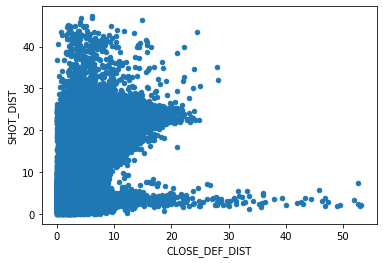

In [57]:
shot_log.fillna(0).plot(y='CLOSE_DEF_DIST', x='SHOT_DIST', kind='scatter')
plt.savefig('Shot_Distance_Close_Defender_Distance.png')

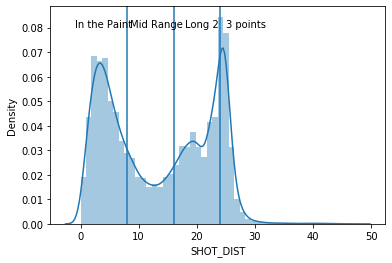

In [58]:
sns.distplot(shot_log.SHOT_DIST)
plt.axvline(8, 0,1)
plt.axvline(16, 0,1)
plt.axvline(24, 0,1)
plt.annotate('In the Paint', xy=(-1,0.08))
plt.annotate('Mid Range', xy=(8.5,0.08))
plt.annotate('Long 2', xy=(18,0.08))
plt.annotate('3 points', xy=(25,0.08))

plt.savefig('Shot_Distance_by_Range.png')

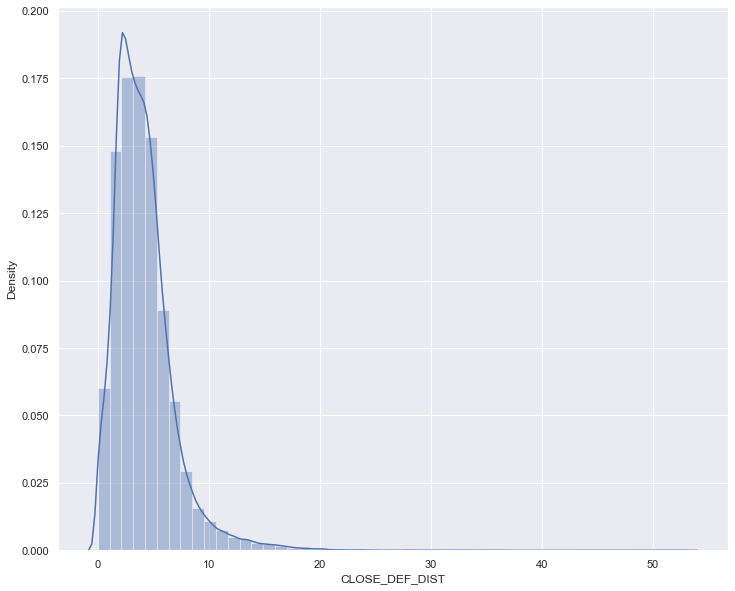

In [59]:
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(shot_log.CLOSE_DEF_DIST)

plt.savefig('CLose_Defender_Density.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


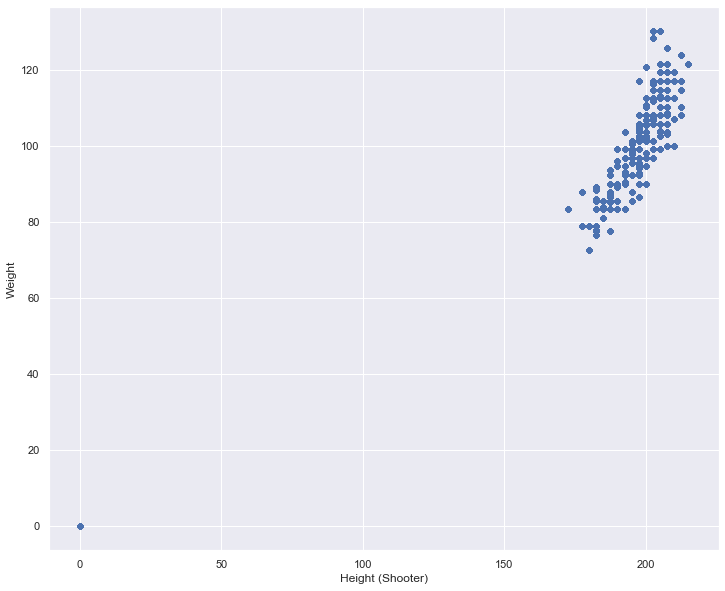

In [60]:
shot_log.fillna(0).plot(x='Height (Shooter)', y='Weight', kind='scatter')
plt.savefig('Player_weight_height.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


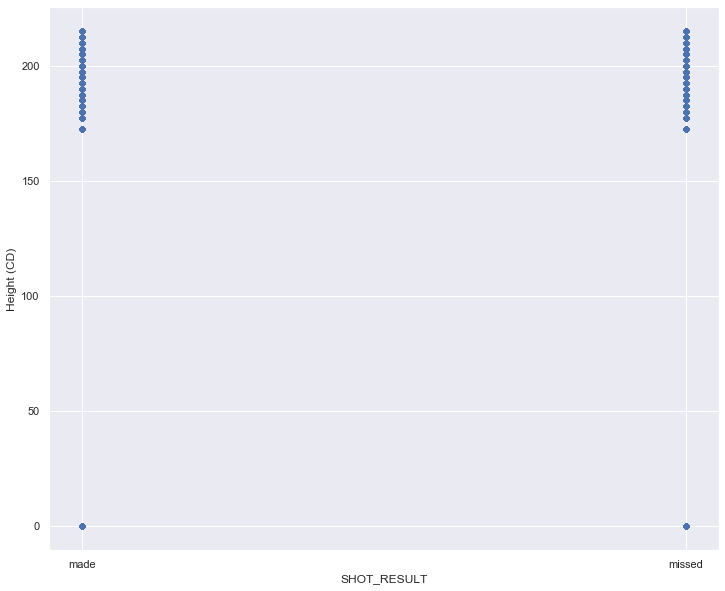

In [61]:
#TS%	eFG%
shot_log.fillna(0).plot(x='SHOT_RESULT', y='Height (CD)', kind='scatter')
plt.savefig('Shot_result_height.png')